Hands-to-mouth households

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

In [2]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()

In [4]:
Models = [model, model1, model2] #Create list of the models
Lambdas = [0.0, 0.2, 0.8] #Create list of Lambda values

for i in range(len(Models)):
    Models[i].par.Lambda = Lambdas[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Tshock = 50
    shock = 0.01*Models[i].ss.chi
    persistence = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock*persistence
    Models[i].find_IRF()

initial:
   max. abs. error = 5.17e+01
    0.00e+00 in bargaining_cond
    5.17e+01 in Bq_match
    0.00e+00 in FOC_capital_agency
    1.95e-14 in FOC_K_ell
    3.68e-01 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 5.17e+01
    1.83e-03 in bargaining_cond
    1.84e+00 in Bq_match
    6.62e-04 in FOC_capital_agency
    3.26e-02 in FOC_K_ell
    3.69e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.2 secs
   max. abs. error = 1.84e+00
    6.03e-04 in bargaining_cond
    3.43e-01 in Bq_match
    1.12e-03 in FOC_capital_agency
    2.33e-02 in FOC_K_ell
    3.24e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 3.43e-01
    2.60e-04 in bargaining_cond
    6.21e-02 in Bq_match
    1.42e-04 in FOC_capital_agency
    4.79e-03 in FOC_K_ell
    6.07e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

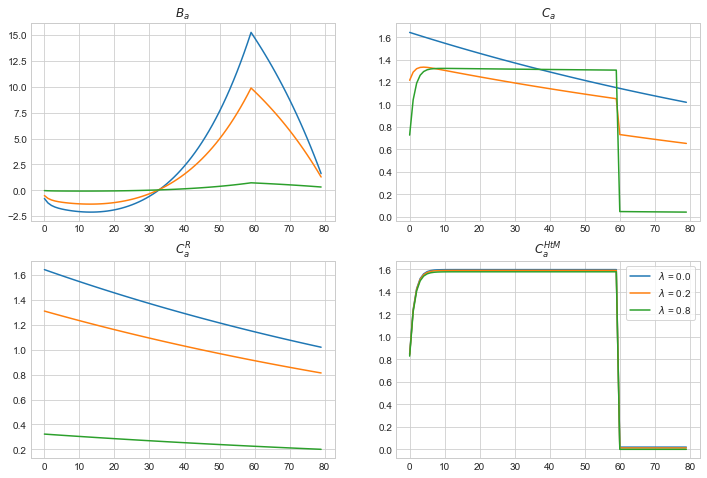

In [8]:
fig = plt.figure(figsize=(2*6,2*6/1.5))

ax = fig.add_subplot(2,2,1)
ax.plot(Models[0].ss.B_a)
ax.plot(Models[1].ss.B_a)
ax.plot(Models[2].ss.B_a)
ax.set_ylabel('')
ax.set_title('$B_a$')

ax = fig.add_subplot(2,2,2)
ax.plot(Models[0].ss.C_a)
ax.plot(Models[1].ss.C_a)
ax.plot(Models[2].ss.C_a)
ax.set_ylabel('')
ax.set_title('$C_a$')

ax = fig.add_subplot(2,2,3)
ax.plot(Models[0].ss.C_R_a)
ax.plot(Models[1].ss.C_R_a)
ax.plot(Models[2].ss.C_R_a)
ax.set_ylabel('')
ax.set_title('$C^{R}_a$')

ax = fig.add_subplot(2,2,4)
ax.plot(Models[0].ss.C_HtM_a,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot(Models[1].ss.C_HtM_a,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot(Models[2].ss.C_HtM_a,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('')
ax.set_title('$C^{HtM}_a$')
ax.legend(frameon=True);

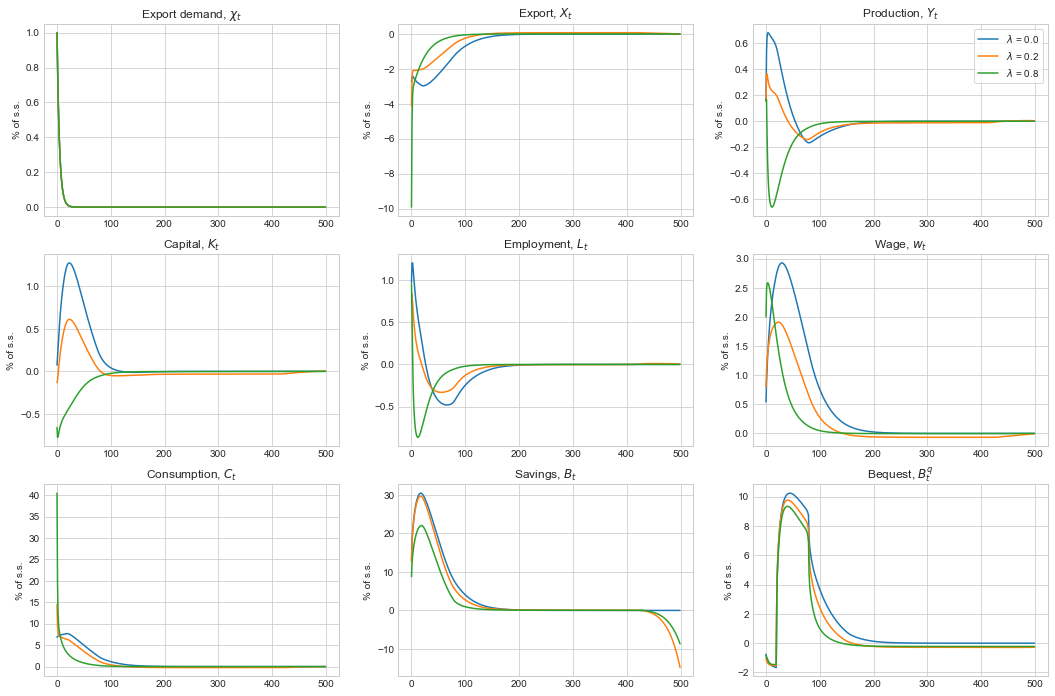

In [10]:
T_IRF = 500

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.chi[:T_IRF]/Models[0].ss.chi-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.chi[:T_IRF]/Models[1].ss.chi-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.chi[:T_IRF]/Models[2].ss.chi-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Export demand, $\chi_t$')

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Export, $X_t$')

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Production, $Y_t$')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Capital, $K_t$')

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Employment, $L_t$')

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.W[:T_IRF]/Models[0].ss.W-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.W[:T_IRF]/Models[1].ss.W-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.W[:T_IRF]/Models[2].ss.W-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Wage, $w_t$')

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption, $C_t$')

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Savings, $B_t$')

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.Bq[:T_IRF]/Models[0].ss.Bq-1)*100,label=f'$\lambda$ = {Models[0].par.Lambda}')
ax.plot((Models[1].sol.Bq[:T_IRF]/Models[1].ss.Bq-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.Bq[:T_IRF]/Models[2].ss.Bq-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Bequest, $B^q_t$');